In [1]:
#!pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
import math 
from sklearn.preprocessing import LabelEncoder


In [3]:
pd.options.display.max_rows = 200
pd.options.display.max_columns = 150

In [4]:
TLC_df = pd.read_csv('data\\accepted_2007_to_2018Q4.csv')
#TLC_df = spark.read.csv('/content/drive/MyDrive/accepted_2007_to_2018Q4.csv', header = "true")
#TLCR_df = spark.read.csv('/content/rejected_2007_to_2018Q4.csv', header = "true")


C:\Users\lenovo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
TLC_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,...,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,...,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,...,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
leak_cols = ['total_rec_late_fee', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
             'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 
             'disbursement_method', 'funded_amnt_inv', 'hardship_flag', 'inq_last_6mths', 
             'initial_list_status', 'mo_sin_old_rev_tl_op', 'mo_sin_old_il_acct','last_pymnt_amnt', 'last_pymnt_d', 
             'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'mo_sin_rcnt_rev_tl_op',
             'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 
             'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m','acc_now_delinq', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',  
             'out_prncp', 'out_prncp_inv', 'pct_tl_nvr_dlq',     'percent_bc_gt_75', 'pymnt_plan', 'recoveries', 
             'tax_liens', 'tot_coll_amt', 'tot_cur_bal', 'last_fico_range_high','last_fico_range_low','url','id',
             'tot_hi_cred_lim','total_bal_ex_mort', 'total_bc_limit', 'chargeoff_within_12_mths',  
             'total_il_high_credit_limit', 'total_pymnt', 'total_pymnt_inv', 'mo_sin_rcnt_tl', 
             'total_rec_int', 'total_rec_prncp','title','addr_state', 'num_tl_op_past_12m', 'last_credit_pull_d',
             'total_rev_hi_lim']
             #, 'funded_amnt'

In [7]:
TLC_df_2 = TLC_df.drop(columns=leak_cols, axis=1)
drop_col_count = len(leak_cols)
print("The new dataframe has {} columns and lost {} after dropping future leaks".format(TLC_df_2.shape[1],
                                                                           drop_col_count))

The new dataframe has 87 columns and lost 64 after dropping future leaks


In [8]:
TLC_df_2.head()

,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,zip_code,dti,earliest_cr_line,fico_range_low,fico_range_high,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,next_pymnt_d,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,inq_fi,total_cu_tl,inq_last_12m,mort_acc,mths_since_recent_bc_dlq,mths_since_recent_revol_delinq,pub_rec_bankruptcies,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,NaN,debt_consolidation,190xx,5.91,Aug-2003,675.0,679.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,NaN,30.0,1.0,Individual,NaN,NaN,NaN,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,3.0,1.0,4.0,1.0,69.0,69.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,NaN,small_business,577xx,16.06,Dec-1999,715.0,719.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,NaN,NaN,1.0,Individual,NaN,NaN,NaN,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,0.0,0.0,6.0,4.0,NaN,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,NaN,home_improvement,605xx,10.78,Aug-2000,695.0,699.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,NaN,NaN,1.0,Joint App,71000.0,13.85,Not Verified,0.0,1.0,0.0,4.0,19.0,10827.0,73.0,0.0,2.0,2081.0,65.0,2.0,5.0,1.0,5.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,NaN,debt_consolidation,076xx,17.06,Sep-2008,785.0,789.0,NaN,NaN,13.0,0.0,7802.0,11.6,17.0,Apr-2019,NaN,1.0,Individual,NaN,NaN,NaN,1.0,1.0,0.0,1.0,23.0,12609.0,70.0,1.0,1.0,6987.0,45.0,0.0,1.0,0.0,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,NaN,major_purchase,174xx,25.37,Jun-1998,695.0,699.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,NaN,NaN,1.0,Individual,NaN,NaN,NaN,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,9702.0,78.0,2.0,1.0,3.0,6.0,12.0,12.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
TLC_df_2.isna().sum()

member_id                                     2260701
loan_amnt                                          33
funded_amnt                                        33
term                                               33
int_rate                                           33
installment                                        33
grade                                              33
sub_grade                                          33
emp_title                                      167002
emp_length                                     146940
home_ownership                                     33
annual_inc                                         37
verification_status                                33
issue_d                                            33
loan_status                                        33
desc                                          2134634
purpose                                            33
zip_code                                           34
dti                         

In [10]:
TLC_df_2.loan_status.value_counts()
#TLC_df_final.head()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [11]:
#converting nan counts into percentage
nan_count=(TLC_df_2.isnull().sum()/len(TLC_df_2))*100
nan_count.sort_values()

verification_status                             0.001460
fico_range_high                                 0.001460
fico_range_low                                  0.001460
purpose                                         0.001460
policy_code                                     0.001460
loan_status                                     0.001460
issue_d                                         0.001460
home_ownership                                  0.001460
application_type                                0.001460
revol_bal                                       0.001460
sub_grade                                       0.001460
grade                                           0.001460
installment                                     0.001460
int_rate                                        0.001460
term                                            0.001460
funded_amnt                                     0.001460
loan_amnt                                       0.001460
zip_code                       

In [12]:
TLC_df_2.shape

(2260701, 87)

In [13]:
#Considering only Fully Paid, Default, Charged Off Loans.
resp=['Current']
TLC_df_2 = TLC_df_2[~TLC_df_2['loan_status'].isin(resp)] 
TLC_df_2["loan_status"] = np.where(TLC_df_2["loan_status"].str.contains("Fully"), 0, 1)

#New Dataset shape
TLC_df_2.head()

,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,zip_code,dti,earliest_cr_line,fico_range_low,fico_range_high,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,next_pymnt_d,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,inq_fi,total_cu_tl,inq_last_12m,mort_acc,mths_since_recent_bc_dlq,mths_since_recent_revol_delinq,pub_rec_bankruptcies,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,0,NaN,debt_consolidation,190xx,5.91,Aug-2003,675.0,679.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,NaN,30.0,1.0,Individual,NaN,NaN,NaN,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,3.0,1.0,4.0,1.0,69.0,69.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,0,NaN,small_business,577xx,16.06,Dec-1999,715.0,719.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,NaN,NaN,1.0,Individual,NaN,NaN,NaN,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,0.0,0.0,6.0,4.0,NaN,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,0,NaN,home_improvement,605xx,10.78,Aug-2000,695.0,699.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,NaN,NaN,1.0,Joint App,71000.0,13.85,Not Verified,0.0,1.0,0.0,4.0,19.0,10827.0,73.0,0.0,2.0,2081.0,65.0,2.0,5.0,1.0,5.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,0,NaN,major_purchase,174xx,25.37,Jun-1998,695.0,699.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,NaN,NaN,1.0,Individual,NaN,NaN,NaN,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,9702.0,78.0,2.0,1.0,3.0,6.0,12.0,12.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,11950.0,11950.0,36 months,13.44,405.18,C,C3,Veterinary Tecnician,4 years,RENT,34000.0,Source Verified,Dec-2015,0,NaN,debt_consolidation,300xx,10.20,Oct-1987,690.0,694.0,NaN,NaN,5.0,0.0,8822.0,68.4,6.0,NaN,NaN,1.0,Individual,NaN,NaN,NaN,0.0,1.0,0.0,0.0,338.0,3976.0,99.0,0.0,0.0,4522.0,76.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#Seperating Loan_Main dataset into two based on Application_Type (Individual / Joint Type)
grouped = TLC_df_2.groupby(TLC_df_2.application_type)
Individual_Loan=grouped.get_group("Individual")
Joint_Loan=grouped.get_group("Joint App")

Individual_Loan.shape, Joint_Loan.shape

((1352767, 87), (29584, 87))

In [15]:
# Changing purpose into numerical using labelencoder
col=['purpose']
enc= LabelEncoder()
Individual_Loan.loc[:,col]= Individual_Loan.loc[:,col].apply(enc.fit_transform)

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [16]:
#removing columns that have only 1 feature
#get unique values per feature
nunique_value = Individual_Loan.apply(pd.Series.nunique)
#note columns that have single value
single_value_cols = nunique_value[nunique_value == 1].index.tolist()
print(single_value_cols)

['policy_code', 'application_type', 'hardship_type', 'deferral_term', 'hardship_length']


In [17]:
# drop the redundant columns
Individual_Loan = Individual_Loan.drop(columns=single_value_cols)

drop_col_count2 = len(single_value_cols)
print("The new dataframe has {} columns and lost {} after dropping single value column".format(Individual_Loan.shape[1],
                                                                           drop_col_count2))

The new dataframe has 82 columns and lost 5 after dropping single value column


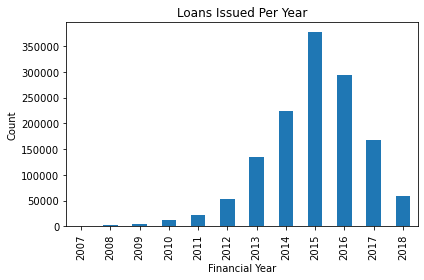

In [18]:
#Loan Issued over the years 

Individual_Loan['issue_d'] = pd.to_datetime(Individual_Loan['issue_d'])

Individual_Loan['issue_d'].dt.year.value_counts().sort_index().plot.bar()
plt.title('Loans Issued Per Year')
plt.xlabel('Financial Year')
plt.ylabel('Count')
plt.tight_layout()

plt.show()

In [19]:
# Dropping Columns based on missing data being more than 90% 
v=Individual_Loan.isnull().sum()
t=len(Individual_Loan)
a=(v/t)*100 


variables = Individual_Loan.columns
variable = [ ]
for i in range(0,len(Individual_Loan.columns)):
    if a[i]<50:   #setting the threshold as 50% (MissingValue)
        variable.append(variables[i])
 # Dropping Columns based on missing data being more than 50% 
drop_columns1=list(set(variables) - set(variable))

drop_columns1

['settlement_term',
 'open_il_12m',
 'settlement_percentage',
 'desc',
 'sec_app_chargeoff_within_12_mths',
 'hardship_amount',
 'il_util',
 'sec_app_collections_12_mths_ex_med',
 'settlement_amount',
 'mths_since_last_major_derog',
 'member_id',
 'sec_app_revol_util',
 'mths_since_recent_bc_dlq',
 'orig_projected_additional_accrued_interest',
 'open_act_il',
 'total_bal_il',
 'dti_joint',
 'hardship_start_date',
 'sec_app_inq_last_6mths',
 'revol_bal_joint',
 'debt_settlement_flag_date',
 'all_util',
 'sec_app_earliest_cr_line',
 'sec_app_open_acc',
 'inq_last_12m',
 'inq_fi',
 'settlement_status',
 'settlement_date',
 'mths_since_rcnt_il',
 'sec_app_fico_range_high',
 'annual_inc_joint',
 'hardship_loan_status',
 'open_acc_6m',
 'sec_app_num_rev_accts',
 'next_pymnt_d',
 'sec_app_mort_acc',
 'sec_app_open_act_il',
 'total_cu_tl',
 'verification_status_joint',
 'hardship_status',
 'sec_app_fico_range_low',
 'max_bal_bc',
 'hardship_payoff_balance_amount',
 'hardship_last_payment_amoun

In [20]:
TLC_df_3=Individual_Loan.drop(columns=drop_columns1)
TLC_df_3.shape

(1352767, 27)

In [21]:
TLC_df_3.mort_acc.value_counts()
#TLC_df_final.head()

0.0     531433
1.0     226329
2.0     188179
3.0     138564
4.0      94267
5.0      57185
6.0      32290
7.0      16745
8.0       8352
9.0       4272
10.0      2200
11.0      1193
12.0       641
13.0       354
14.0       242
15.0       135
16.0        93
17.0        61
18.0        47
19.0        28
20.0        26
24.0        16
22.0        15
21.0        14
23.0        10
25.0         9
27.0         8
26.0         6
28.0         4
29.0         4
34.0         3
30.0         2
32.0         2
37.0         2
31.0         2
51.0         1
47.0         1
36.0         1
35.0         1
Name: mort_acc, dtype: int64

In [22]:
#Updated percentage of the nancount in the new df
nan_count=(TLC_df_3.isnull().sum()/len(TLC_df_3))*100
nan_count.sort_values()

loan_amnt               0.000000
revol_bal               0.000000
fico_range_high         0.000000
fico_range_low          0.000000
dti                     0.000000
purpose                 0.000000
issue_d                 0.000000
verification_status     0.000000
home_ownership          0.000000
loan_status             0.000000
int_rate                0.000000
funded_amnt             0.000000
sub_grade               0.000000
term                    0.000000
grade                   0.000000
installment             0.000000
zip_code                0.000074
annual_inc              0.000296
open_acc                0.002144
pub_rec                 0.002144
total_acc               0.002144
earliest_cr_line        0.002144
revol_util              0.065052
pub_rec_bankruptcies    0.100904
mort_acc                3.698346
emp_length              5.697212
emp_title               6.257545
dtype: float64

In [23]:
def df_object_to_num(df_obj):
    
    TLC_df_final = df_obj.copy()
    
    #keep track of columns to drop at end
    col_drop_list = ['emp_title']
    
    # Changing employee length to numerical.
    TLC_df_final['emp_length'].fillna("< 1 year",inplace= True)
    dict_emp_length = {'10+ years':10, '6 years':6, '4 years':4, '< 1 year':0.5, '2 years':2,'9 years':9, '5 years':5, '3 years':3, '7 years':7, '1 year':1,'8 years':8}
    TLC_df_final['emp_length'].replace(dict_emp_length, inplace=True)
        
    ### instantiate dicts ### 
    term_to_int = {' 36 months': 1,
               ' 60 months': 2}
    grade_to_int = dict(zip(['A', 'B', 'C', 'D', 'E', 'F', 'G'], np.arange(7, 0, -1)))
    #copied from above, we can write a function to generate this dict
    sub_grade_sorted = {'G5': 0, 'G4': 1, 'G3': 2, 'G2': 3, 'G1': 4,
                        'F5': 5, 'F4': 6, 'F3': 7, 'F2': 8, 'F1': 9,
                        'E5': 10, 'E4': 11, 'E3': 12, 'E2': 13, 'E1': 14,
                        'D5': 15, 'D4': 16, 'D3': 17, 'D2': 18, 'D1': 19,
                        'C5': 20, 'C4': 21, 'C3': 22, 'C2': 23, 'C1': 24,
                        'B5': 25, 'B4': 26, 'B3': 27, 'B2': 28, 'B1': 29,
                        'A5': 30, 'A4': 31, 'A3': 32, 'A2': 33, 'A1': 34}    
    home_to_int = {'MORTGAGE': 4, 'RENT': 3, 'OWN': 5,'ANY': 2,'OTHER': 1, 'NONE':0 }
    ver_stat_to_int = {'Source Verified':2,'Verified': 1,'Not Verified': 0} 
    #replacements
    TLC_df_final.replace({'term': term_to_int, 'grade':grade_to_int,'sub_grade': sub_grade_sorted, 'home_ownership':home_to_int,'verification_status':ver_stat_to_int}, inplace=True)
        
    #fix zip codes and keep first 3
    TLC_df_final['zip_3'] = TLC_df_final['zip_code'].str.replace('x','')
    TLC_df_final['zip_2'] = TLC_df_final['zip_3'].str[:2]
    
    TLC_df_final['earliest_cr_line']=  pd.to_datetime(TLC_df_final['earliest_cr_line'], infer_datetime_format=True)
    TLC_df_final['issue_d']=  pd.to_datetime(TLC_df_final['issue_d'], infer_datetime_format=True)
    credit_hist= TLC_df_final['issue_d'] - TLC_df_final['earliest_cr_line']
    TLC_df_final['credit_hist']=credit_hist.dt.days
    
    col_drop_list.append('earliest_cr_line')
    col_drop_list.append('issue_d')
    col_drop_list.append('zip_code')
    
    TLC_df_final['fico_avg_score'] = (TLC_df_final['fico_range_high']+TLC_df_final['fico_range_low'] )/2
    col_drop_list.extend(['fico_range_high','fico_range_low'])
    
    TLC_df_final['inst_amnt_ratio']=TLC_df_final['installment']/TLC_df_final['loan_amnt']
    col_drop_list.extend(['installment'])
    
    
    
    TLC_df_final  = TLC_df_final.drop(columns=col_drop_list)
    
    return TLC_df_final

In [24]:
TLC_df_final = df_object_to_num(TLC_df_3)
TLC_df_final.head()

,loan_amnt,funded_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,zip_3,zip_2,credit_hist,fico_avg_score,inst_amnt_ratio
0,3600.0,3600.0,1,13.99,5,21,10.0,4,55000.0,0,0,2,5.91,7.0,0.0,2765.0,29.7,13.0,1.0,0.0,190,19,4505.0,677.0,0.034175
1,24700.0,24700.0,1,11.99,5,24,10.0,4,65000.0,0,0,11,16.06,22.0,0.0,21470.0,19.2,38.0,4.0,0.0,577,57,5844.0,717.0,0.033210
4,10400.0,10400.0,2,22.45,2,9,3.0,4,104433.0,2,0,6,25.37,12.0,0.0,21929.0,64.5,35.0,6.0,0.0,174,17,6392.0,697.0,0.027876
5,11950.0,11950.0,1,13.44,5,22,4.0,3,34000.0,2,0,2,10.20,5.0,0.0,8822.0,68.4,6.0,0.0,0.0,300,30,10288.0,692.0,0.033906
6,20000.0,20000.0,1,9.17,6,28,10.0,4,180000.0,0,0,2,14.67,12.0,0.0,87329.0,84.5,27.0,4.0,0.0,550,55,9314.0,682.0,0.031879


In [25]:
TLC_df_final.zip_2.value_counts()

33    52212
92    49698
11    45817
60    40011
95    36147
30    35876
10    33970
94    32599
77    30472
85    29872
90    29016
91    28908
32    28651
07    28435
75    28323
48    25963
80    25842
98    25582
78    24001
20    23428
02    22219
08    20674
28    20373
89    20134
06    20012
93    19722
55    19688
76    18988
19    18254
21    17848
27    17636
44    16659
97    16306
29    16074
46    15904
34    15739
01    14916
43    14572
37    14545
22    14264
14    13453
23    13181
45    12606
70    12420
53    11065
12    10508
15    10327
84     9871
35     9575
49     9457
63     9314
79     8790
18     8716
96     8565
72     8483
17     8010
38     7976
13     7927
31     7714
64     7246
36     7169
40     7109
66     7093
99     6657
54     6605
03     6562
61     6284
74     6207
73     6030
62     5743
47     5714
24     5345
87     5168
39     4783
71     4729
65     4701
16     4330
56     4306
67     4093
59     3762
81     3667
68     3150
41     2993
57  

In [26]:
#drop nans in case we missed any
TLC_df_final = TLC_df_final.dropna(axis=0)

In [27]:
TLC_df_final.shape

(1301958, 25)

In [28]:
TLC_df_final.to_csv('C:\\Users\\lenovo\\Dissertation 2021\\data\\TLC_df_final.csv')